# Love (for Selrotis) in the time of Tihar

In this notebook, we'll chart our love for [Selrotis](https://en.wikipedia.org/wiki/Sel_roti) before, during and after [Tihar](https://goo.gl/TpNY5j).

It is bound to be a thriller with many twists and turns!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns

## Initial Styling

In [2]:
# Padding between title and plot
rcParams['axes.titlepad'] = 30

# Font stuff
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']

# Poster context gives appropriately large fonts
sns.set_context('poster')

# Use R's ggplot styling
plt.style.use('ggplot')

## Creating the data

How can we quantify love? 

Ans: By thinking of a bunch of random numbers as rough estimates. 

In [3]:
# Love quantified over 18 days
selroti_love = [5., 7., 11.2, 20., #Laxmi Puja
                8.1, 3.2, # Bhai Tika
                -8.11, -3.2, 1.1,
                12., # First Lunch
                7., # Second Lunch
                -4., # Third Lunch
                2., 7., 3., 5., 5., 5.]

To get a smooth plot, we need to interpolate in the values. 

We'll use `scipy` for that.

In [4]:
from scipy.interpolate import interp1d

In [5]:
# For 18 days
x = np.arange(18)

# 500 equally spaced numbers in the interval
x_new = np.linspace(x.min(), x.max(), 500)

# Fit interpolation to selroti_love
f = interp1d(x, selroti_love, kind='quadratic')

# Generate corresponding smooth y
y_smooth = f(x_new)

## Plotting

Let's get to the main part! 

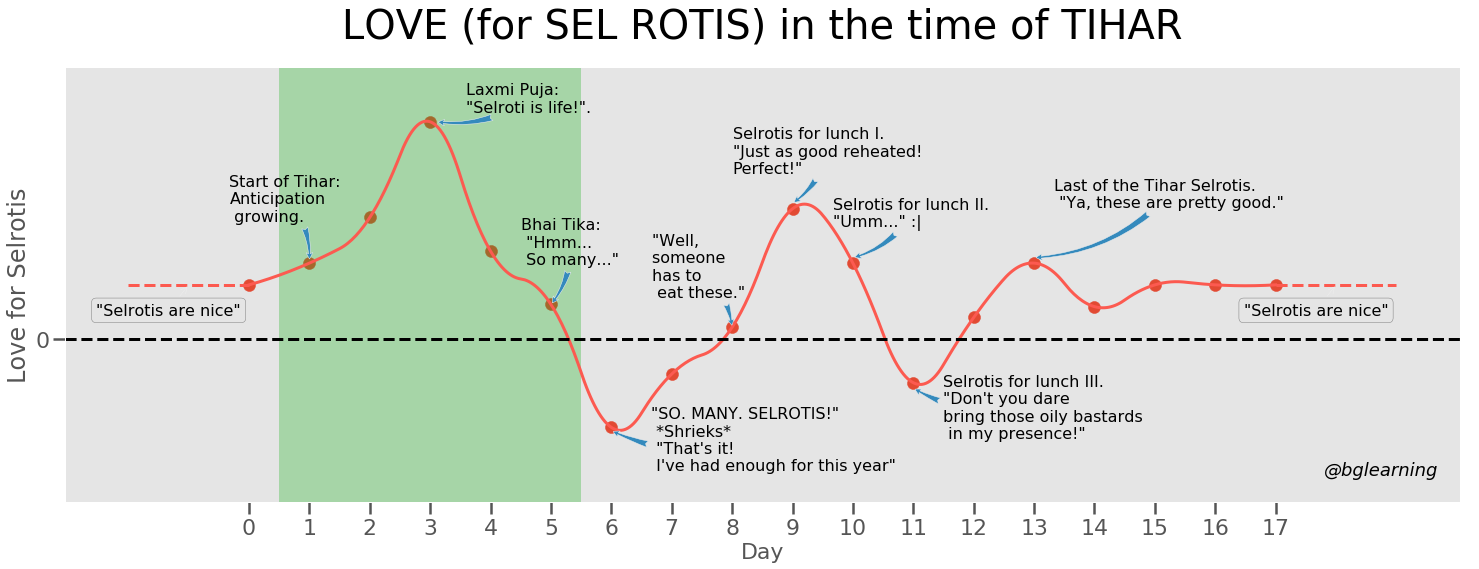

In [6]:
fig, ax = plt.subplots(figsize=(25, 8))

# The color of our love line
line_color = 'xkcd:coral'

# Our love starts and ends as constant values
# which amounts to extending x[0] at the beginning
# and x[-1] at the end.
# That gets plotted as a dotted line.
ax.plot([x[0] - 2, x[0] - 1, x[0]], 
        [selroti_love[0]] * 3,
        linestyle='--', color=line_color)
ax.plot([x[-1], x[-1] + 1, x[-1] + 2], 
        [selroti_love[-1]] * 3,
        linestyle='--', color=line_color)

# Plot Data
ax.plot(x_new,y_smooth, color=line_color)
ax.scatter(x, selroti_love)

# Limits
ax.set_ylim(bottom=-15, top=25)

# Remove Grid
ax.grid(False)

# Add a green background for the Tihar period
ax.axvspan(0.5, 5.5, facecolor='xkcd:green', alpha=0.3)

# Even though we are quantifying love internally, we don't want to show it.
# Love cannot be quantified!
# Only set tick on origin axis to separate when it's positive and negative.
ax.yaxis.set_ticks([0])

# Show horizontal line on x-axis
ax.axhline(y=0, color='k', linestyle='--')

# Only place ticks on the explicitly specified days.
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(x)

# --------------- Commentaries/Annotations -----------------

ax.annotate('Start of Tihar: \nAnticipation\n growing.', xy=(x[1], selroti_love[1] + 0.2),  xycoords='data',
            xytext=(-80, 40), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('Laxmi Puja: \n"Selroti is life!".', xy=(x[3] + 0.1, selroti_love[3]),  xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('Bhai Tika:\n "Hmm...\n So many..."', xy=(x[5], selroti_love[5]),  xycoords='data',
            xytext=(-30, 40), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('"SO. MANY. SELROTIS!"\n *Shrieks*\n "That\'s it!\n I\'ve had enough for this year"', xy=(x[6], selroti_love[6] -0.3),  xycoords='data',
            xytext=(40, -40), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('"Well, \nsomeone \nhas to\n eat these."', xy=(x[8], selroti_love[8]),  xycoords='data',
            xytext=(-80, 30), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('Selrotis for lunch I.\n"Just as good reheated!\nPerfect!"', xy=(x[9], selroti_love[9] + 0.5),  xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('Selrotis for lunch II.\n"Umm..." :| ', xy=(x[10], selroti_love[10] + 0.5),  xycoords='data',
            xytext=(-20, 30), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('Selrotis for lunch III.\n"Don\'t you dare\nbring those oily bastards\n in my presence!"', xy=(x[11], selroti_love[11] - 0.5),  xycoords='data',
            xytext=(30, -50), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('Last of the Tihar Selrotis.\n "Ya, these are pretty good."', xy=(x[13], selroti_love[13] + 0.5),  xycoords='data',
            xytext=(20, 50), textcoords='offset points',
            fontsize=16,
            arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))

ax.annotate('"Selrotis are nice"', xy=(x[0] - 1, selroti_love[0]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-20, -30), textcoords='offset points', ha='center',
            fontsize=16,
            arrowprops=dict(arrowstyle="->"))

ax.annotate('"Selrotis are nice"', xy=(x[-1] + 1, selroti_love[-1]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-20, -30), textcoords='offset points', ha='center',
            fontsize=16,
            arrowprops=dict(arrowstyle="->"))

# -------------------- End of commentaries --------------------------

# Title and labels
ax.set_title('LOVE (for SEL ROTIS) in the time of TIHAR', fontsize=40)
ax.set_ylabel('Love for Selrotis', fontsize=24)
ax.set_xlabel('Day', fontsize=22)

# Signature
ax.text(17.8, -12.5, "@bglearning", fontsize=18, style='italic')

# We are done!
plt.savefig('Selrotis.png') 